In [143]:
import pandas as pd
df = pd.read_csv('2019.csv')
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [123]:
print(df.shape)
print(df.isna().sum())

(156, 9)
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


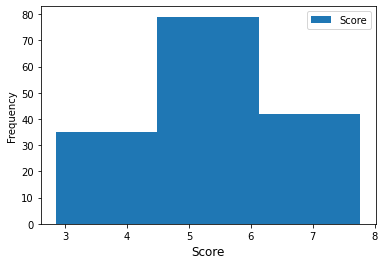

In [124]:
import matplotlib.pyplot as plt
df[['Score']].plot(kind='hist', bins=3)
plt.xlabel('Score', fontsize=12)
plt.show()

In [170]:
Quality = []
for i in df['Score']:
    if i < 4.5 :
        Quality.append('Poor')
    if 4.5 <= i < 6:
        Quality.append('Intermediate')
    if i >= 6 :
        Quality.append('Good')
column = ['Quality']
qty = pd.DataFrame(Quality, columns=column)
print(qty.head())

  Quality
0    Good
1    Good
2    Good
3    Good
4    Good


In [117]:
print(type(qty))
print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [171]:
data = pd.concat([df, qty], axis=1)
print(data.shape)
print(data.head())

(156, 10)
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption Quality  
0                     0.0855    Good  
1                     

In [121]:
poor = data[data['Quality'] == 'Poor']
print(poor)

     Overall rank         Country or region  Score  GDP per capita  \
154           155  Central African Republic  3.083           0.026   

     Social support  Healthy life expectancy  Freedom to make life choices  \
154             0.0                    0.105                         0.225   

     Generosity  Perceptions of corruption Quality  
154       0.235                      0.035    Poor  


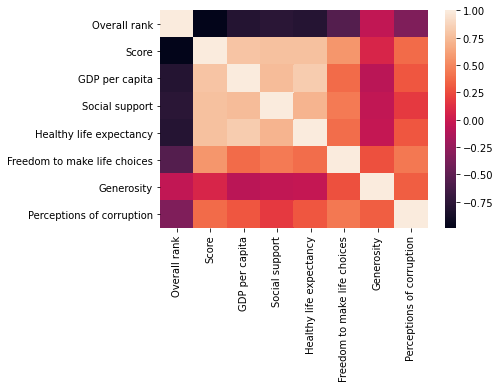

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

hm = data.corr()
sns.heatmap(hm)
plt.xticks(rotation=90)
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,3:9]
y = data['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confussion Matrix:')
print(cm)
print('Classification report: ')
print(cr)

data_test = {'GDP per capita' : [0.25],
                'Social support' : [0.18],
                'Healthy life expectancy' : [0.23],
                'Freedom to make life choices' : [0.43],
                'Generosity' : [0.43],
                'Perceptions of corruption' : [0.42]}

data_testing = pd.DataFrame(data_test)
testing = lr.predict(data_testing)
print(testing)

0.7981651376146789
0.6808510638297872
Confussion Matrix:
[[11  5  0]
 [ 3 17  3]
 [ 0  4  4]]
Classification report: 
              precision    recall  f1-score   support

        Good       0.79      0.69      0.73        16
Intermediate       0.65      0.74      0.69        23
        Poor       0.57      0.50      0.53         8

    accuracy                           0.68        47
   macro avg       0.67      0.64      0.65        47
weighted avg       0.68      0.68      0.68        47

['Poor']


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
dr = DecisionTreeClassifier()
dr = dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
print(dr.score(X_train, y_train))
print(dr.score(X_test, y_test))
cm2 = confusion_matrix(y_test, y_pred)
cr2 = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: ')
print(accuracy)
print('Confussion Matrix:')
print(cm2)
print('Classification report: ')
print(cr2)
data_test = {'GDP per capita' : [0.45],
                'Social support' : [0.38],
                'Healthy life expectancy' : [0.43],
                'Freedom to make life choices' : [0.63],
                'Generosity' : [0.23],
                'Perceptions of corruption' : [0.52]}

data_testing = pd.DataFrame(data_test)
testing = dr.predict(data_testing)
print(testing)

1.0
0.6382978723404256
Accuracy score: 
0.6382978723404256
Confussion Matrix:
[[12  4  0]
 [ 2 17  4]
 [ 0  7  1]]
Classification report: 
              precision    recall  f1-score   support

        Good       0.86      0.75      0.80        16
Intermediate       0.61      0.74      0.67        23
        Poor       0.20      0.12      0.15         8

    accuracy                           0.64        47
   macro avg       0.55      0.54      0.54        47
weighted avg       0.62      0.64      0.62        47

['Poor']


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf = dr.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: ')
print(accuracy)
print('Confussion Matrix:')
print(cm)
print('Classification report: ')
print(cr)
data_test = {'GDP per capita' : [0.45],
                'Social support' : [0.38],
                'Healthy life expectancy' : [0.43],
                'Freedom to make life choices' : [0.63],
                'Generosity' : [0.23],
                'Perceptions of corruption' : [0.52]}

data_testing = pd.DataFrame(data_test)
testing = dr.predict(data_testing)
print(testing)

1.0
0.6595744680851063
Accuracy score: 
0.6595744680851063
Confussion Matrix:
[[11  5  0]
 [ 2 17  4]
 [ 0  5  3]]
Classification report: 
              precision    recall  f1-score   support

        Good       0.85      0.69      0.76        16
Intermediate       0.63      0.74      0.68        23
        Poor       0.43      0.38      0.40         8

    accuracy                           0.66        47
   macro avg       0.63      0.60      0.61        47
weighted avg       0.67      0.66      0.66        47

['Intermediate']


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: ')
print(accuracy)
print('Confussion Matrix:')
print(cm)
print('Classification report: ')
print(cr)
data_test = {'GDP per capita' : [0.45],
                'Social support' : [0.38],
                'Healthy life expectancy' : [0.43],
                'Freedom to make life choices' : [0.63],
                'Generosity' : [0.23],
                'Perceptions of corruption' : [0.52]}

data_testing = pd.DataFrame(data_test)
testing = dr.predict(data_testing)
print(testing)

1.0
0.6595744680851063
Accuracy score: 
0.6595744680851063
Confussion Matrix:
[[11  5  0]
 [ 3 17  3]
 [ 0  5  3]]
Classification report: 
              precision    recall  f1-score   support

        Good       0.79      0.69      0.73        16
Intermediate       0.63      0.74      0.68        23
        Poor       0.50      0.38      0.43         8

    accuracy                           0.66        47
   macro avg       0.64      0.60      0.61        47
weighted avg       0.66      0.66      0.66        47

['Intermediate']


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

linear = LinearRegression()
linear = linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
rscore = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('Root mean squared error: ', rmse)
print('R2 score: ', rscore)
print('')

data_test = {'GDP per capita' : [0.25],
                'Social support' : [0.18],
                'Healthy life expectancy' : [0.23],
                'Freedom to make life choices' : [0.43],
                'Generosity' : [0.43],
                'Perceptions of corruption' : [0.42]}

data_testing = pd.DataFrame(data_test)
testing = linear.predict(data_testing)
print(testing)

Mean squared error:  0.31914967962634555
Mean absolute error:  0.4520039494056047
Root mean squared error:  0.5649333408698283
R2 score:  0.6864084164645499

[3.39872951]


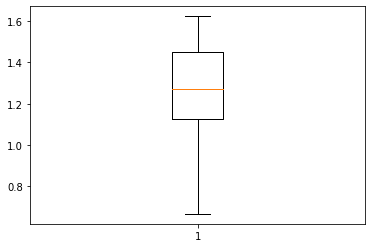

In [148]:
x = df.iloc[:,4]
plt.boxplot(x)
plt.show()

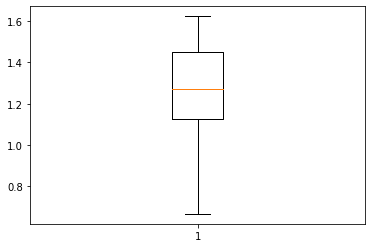

In [147]:
median4 = df.iloc[:,4].median()
q14 = df.iloc[:,4].quantile(0.25)
q34 = df.iloc[:,4].quantile(0.75)
iqr4 = q34 - q14
o14 = q14 - 1.5*iqr4
o34 = q34 + 1.5*iqr4
df.iloc[:,4] = df.iloc[:,4].mask(df.iloc[:,4] < o14, median4)
y = df.iloc[:,4]
plt.boxplot(y)
plt.show()

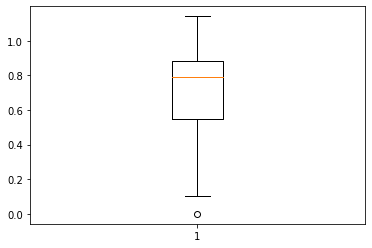

In [155]:
x = df.iloc[:,5]
plt.boxplot(x)
plt.show()

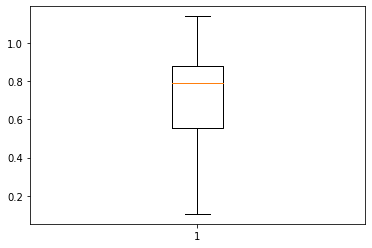

In [156]:
median4 = df.iloc[:,5].median()
q14 = df.iloc[:,5].quantile(0.25)
q34 = df.iloc[:,5].quantile(0.75)
iqr4 = q34 - q14
o14 = q14 - 1.5*iqr4
o34 = q34 + 1.5*iqr4
df.iloc[:,5] = df.iloc[:,5].mask(df.iloc[:,5] < o14, median4)
y = df.iloc[:,5]
plt.boxplot(y)
plt.show()

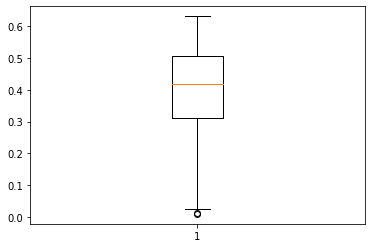

In [159]:
x = df.iloc[:,6]
plt.boxplot(x)
plt.show()

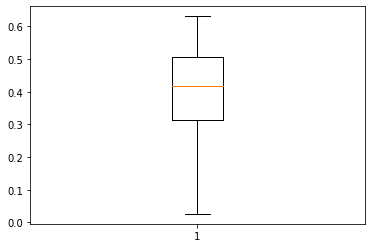

In [160]:
median4 = df.iloc[:,6].median()
q14 = df.iloc[:,6].quantile(0.25)
q34 = df.iloc[:,6].quantile(0.75)
iqr4 = q34 - q14
o14 = q14 - 1.5*iqr4
o34 = q34 + 1.5*iqr4
df.iloc[:,6] = df.iloc[:,6].mask(df.iloc[:,6] < o14, median4)
y = df.iloc[:,6]
plt.boxplot(y)
plt.show()

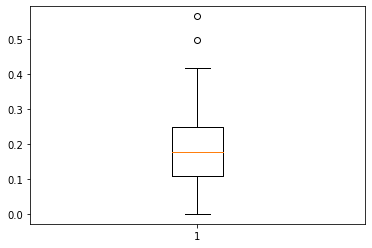

In [161]:
x = df.iloc[:,7]
plt.boxplot(x)
plt.show()

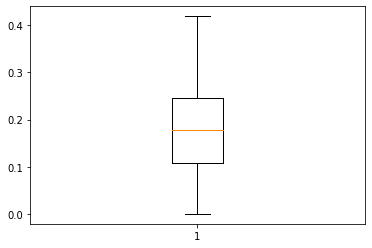

In [162]:
median4 = df.iloc[:,7].median()
q14 = df.iloc[:,7].quantile(0.25)
q34 = df.iloc[:,7].quantile(0.75)
iqr4 = q34 - q14
o14 = q14 - 1.5*iqr4
o34 = q34 + 1.5*iqr4
df.iloc[:,7] = df.iloc[:,7].mask(df.iloc[:,7] > o34, median4)
y = df.iloc[:,7]
plt.boxplot(y)
plt.show()

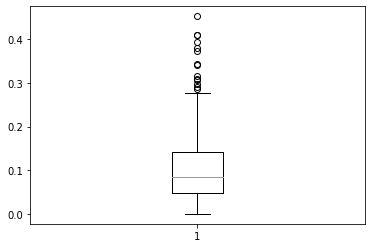

In [163]:
x = df.iloc[:,8]
plt.boxplot(x)
plt.show()

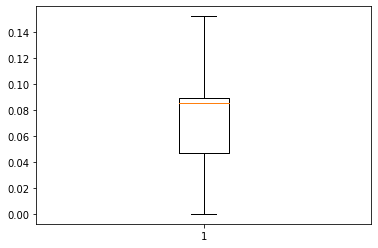

In [169]:
median4 = df.iloc[:,8].median()
q14 = df.iloc[:,8].quantile(0.25)
q34 = df.iloc[:,8].quantile(0.75)
iqr4 = q34 - q14
o14 = q14 - 1.5*iqr4
o34 = q34 + 1.5*iqr4
df.iloc[:,8] = df.iloc[:,8].mask(df.iloc[:,8] > o34, median4)
y = df.iloc[:,8]
plt.boxplot(y)
plt.show()

In [96]:
id = data[data['Country or region'] == 'Indonesia']

In [97]:
print(id)

    Overall rank Country or region  Score  GDP per capita  Social support  \
91            92         Indonesia  5.192           0.931           1.203   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
91                     0.66                         0.491       0.498   

    Perceptions of corruption       Quality  
91                      0.028  Intermediate  


In [98]:
print(data.tail())

     Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption Quality  
151       0.217                      0.411    Poor  
152 